In [ ]:
# @title 1. Clone Code and Install Dependencies
import os
from google.colab import files

# Cài đặt git, conda (nếu cần), và ffmpeg. Colab đã có sẵn hầu hết.
# Chỉ cần đảm bảo các công cụ cần thiết (như FFmpeg) có sẵn.

# Clone mã nguồn
!git clone https://github.com/KwaiVGI/LivePortrait
%cd LivePortrait

# Cài đặt PyTorch và các dependencies còn lại
# Colab thường dùng GPU NVIDIA. Chúng ta sẽ cài đặt PyTorch cho CUDA (thường là 12.1 hoặc mới hơn).
# Ta sẽ dùng phiên bản PyTorch 2.3.0 cho CUDA 12.1 theo khuyến nghị của repo.
# Nếu gặp lỗi, bạn có thể thử bỏ --index-url để Colab tự quyết định phiên bản.

print("Installing PyTorch and dependencies...")
!pip install torch==2.3.0 torchvision==0.18.0 torchaudio==2.3.0 --index-url https://download.pytorch.org/whl/cu121
!pip install -r requirements.txt
!pip install gradio # Cần cho Gradio Web UI
!pip install Pillow==9.5.0 # Khắc phục lỗi Pillow có thể xảy ra
!pip install "huggingface_hub[cli]" # Cần cho việc tải trọng số

print("\nSetup complete. Ready for model download.")

Cloning into 'LivePortrait'...
remote: Enumerating objects: 1075, done.
remote: Counting objects: 100% (298/298), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 1075 (delta 266), reused 247 (delta 247), pack-reused 777 (from 2)
Receiving objects: 100% (1075/1075), 38.75 MiB | 28.20 MiB/s, done.
Resolving deltas: 100% (549/549), done.
/content/LivePortrait/LivePortrait
Installing PyTorch and dependencies...
Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.9/780.9 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 117.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 104.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 92.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 108.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 MB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Pillow: filename=Pillow-9.5.0-cp312-cp312-linux_x86_64.whl size=1210272 sha256=388235327ee3ab1ebe27e1f453fe1d8c77b6803d36798f66a923d8a970c4cb3f
  Stored in directory: /root/.cache/pip/wheels/ea/de/2e/75a6399e5d8cd3a55c13c8f0658d996d4ce4cff37389de044c
Successfully built Pillow
  Attempting uninstall: Pillow
    Found existing installation: pillow 10.4.0
    Uninstalling pillow-10.4.0:
      Successfully uninstalled pillow-10.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 5.1.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.38.0 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 4.0 MB/s eta 0:00:00

Setup complete. Ready for model download.


In [ ]:
# @title 2. Download Pretrained Weights
import os

PRETRAINED_DIR = "pretrained_weights"
if not os.path.exists(PRETRAINED_DIR):
    os.makedirs(PRETRAINED_DIR)

print(f"Downloading weights to /{PRETRAINED_DIR}...")

# Tải các trọng số từ HuggingFace
!huggingface-cli download KwaiVGI/LivePortrait --local-dir pretrained_weights --exclude "*.git*" "README.md" "docs"

print("\nDownload complete. Ready for inference.")

⚠️  Warning: 'huggingface-cli download' is deprecated. Use 'hf download' instead.
Fetching 20 files:   0% 0/20 [00:00<?, ?it/s]Downloading 'liveportrait/base_models/motion_extractor.pth' to 'pretrained_weights/.cache/huggingface/download/liveportrait/base_models/K0D9rBQicolH41TOWUpuFUb_e4U=.251e6a94ad667a1d0c69526d292677165110ef7f0cf0f6d199f0e414e8aa0ca5.incomplete'

insightface/models/buffalo_l/2d106det.on(…):   0% 0.00/5.03M [00:00<?, ?B/s]

liveportrait/base_models/motion_extracto(…):   0% 0.00/113M [00:00<?, ?B/s]


liveportrait/base_models/warping_module.(…):   0% 0.00/182M [00:00<?, ?B/s]



liveportrait/base_models/appearance_feat(…):   0% 0.00/3.39M [00:00<?, ?B/s]




docs/showcase2.gif:   0% 0.00/2.88M [00:00<?, ?B/s]





insightface/models/buffalo_l/det_10g.onn(…):   0% 0.00/16.9M [00:00<?, ?B/s]






docs/inference.gif:   0% 0.00/820k [00:00<?, ?B/s]







liveportrait/base_models/spade_generator(…):   0% 0.00/222M [00:00<?, ?B/s]



liveportrait/base_models/appearance_f

In [ ]:
# @title 3. Upload Source Image and Driving Video
# @markdown Tải lên ảnh tĩnh (Source Image) và video/gif biểu cảm (Driving Video).
# @markdown Các file sẽ được lưu vào thư mục 'custom_inputs/'.

INPUT_DIR = "custom_inputs"
if not os.path.exists(INPUT_DIR):
    os.makedirs(INPUT_DIR)

# Tải lên file
print("Please upload your Source Image (e.g., source.jpg) and Driving Video (e.g., drive.mp4):")
uploaded = files.upload()

# Di chuyển các file đã tải lên vào thư mục INPUT_DIR
for filename in uploaded.keys():
    os.rename(filename, os.path.join(INPUT_DIR, filename))
    print(f"File {filename} uploaded to {INPUT_DIR}/")

# @markdown ---
# @markdown **Điền tên file của bạn vào đây (ví dụ: source.jpg và drive.mp4):**
SOURCE_IMAGE_NAME = "source.png" # @param {type:"string"}
DRIVING_VIDEO_NAME = "drive.mp4" # @param {type:"string"}

SOURCE_IMAGE_PATH = os.path.join(INPUT_DIR, SOURCE_IMAGE_NAME)
DRIVING_VIDEO_PATH = os.path.join(INPUT_DIR, DRIVING_VIDEO_NAME)

print(f"\nSource Image: {SOURCE_IMAGE_PATH}")
print(f"Driving Video: {DRIVING_VIDEO_PATH}")

if not os.path.exists(SOURCE_IMAGE_PATH) or not os.path.exists(DRIVING_VIDEO_PATH):
    print("\n⚠️ WARNING: One or both files not found. Please ensure file names match the uploaded files.")

Please upload your Source Image (e.g., source.jpg) and Driving Video (e.g., drive.mp4):


Saving drive.mp4 to drive.mp4
File drive.mp4 uploaded to custom_inputs/

Source Image: custom_inputs/source.png
Driving Video: custom_inputs/drive.mp4


In [ ]:
# @title 4. Run Inference (Generate Video)
# @markdown Chạy mô hình để tạo video.
# @markdown **Lưu ý:** Nếu bạn không tải file lên ở Cell 3, nó sẽ chạy với ảnh và video mẫu mặc định.

# Sử dụng đường dẫn từ Cell 3. Nếu Cell 3 chưa chạy, dùng mẫu mặc định để tránh lỗi.
if 'SOURCE_IMAGE_PATH' not in locals() or not os.path.exists(SOURCE_IMAGE_PATH):
    SOURCE_IMAGE_PATH = "assets/examples/source/s9.jpg"
    print("Using default example image.")

if 'DRIVING_VIDEO_PATH' not in locals() or not os.path.exists(DRIVING_VIDEO_PATH):
    DRIVING_VIDEO_PATH = "assets/examples/driving/d0.mp4"
    print("Using default example driving video.")

OUTPUT_DIR = "animations"
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

# Chạy inference
print("\nStarting video generation...")
!python inference.py \
    -s {SOURCE_IMAGE_PATH} \
    -d {DRIVING_VIDEO_PATH} \
    --output_dir {OUTPUT_DIR} \
    --flag_crop_driving_video # Tùy chọn này giúp crop video biểu cảm về tỷ lệ 1:1

# Tìm tên file đầu ra (tên file được tạo dựa trên tên file đầu vào)
# Ví dụ: s9.jpg + d0.mp4 -> animations/s9--d0_concat.mp4
import glob
import time

# Chờ một chút để file được ghi xong
time.sleep(5)

# Tìm file .mp4 mới nhất trong thư mục animations
output_files = glob.glob(f"{OUTPUT_DIR}/*.mp4")
output_files.sort(key=os.path.getmtime, reverse=True)

if output_files:
    LATEST_OUTPUT = output_files[0]
    print(f"\n✅ Generation complete. Output file: {LATEST_OUTPUT}")

    # Hiển thị video
    from IPython.display import Video, display
    display(Video(LATEST_OUTPUT, embed=True, html_attributes="controls loop"))
else:
    print("\n❌ Error: Could not find the generated video file. Check the console output for errors.")


Starting video generation...
[04:27:36] Load appearance_feature_extractor from    ]8;id=758366;file:///content/LivePortrait/LivePortrait/src/live_portrait_wrapper.py\live_portrait_wrapper.py]8;;\:]8;id=122327;file:///content/LivePortrait/LivePortrait/src/live_portrait_wrapper.py#46\46]8;;\
           /content/LivePortrait/LivePortrait/pretra                            
           ined_weights/liveportrait/base_models/app                            
           earance_feature_extractor.pth done.                                  
[04:27:37] Load motion_extractor from                ]8;id=452877;file:///content/LivePortrait/LivePortrait/src/live_portrait_wrapper.py\live_portrait_wrapper.py]8;;\:]8;id=143809;file:///content/LivePortrait/LivePortrait/src/live_portrait_wrapper.py#49\49]8;;\
           /content/LivePortrait/LivePortrait/pretra                            
           ined_weights/liveportrait/base_models/mot                            
           ion_extractor.

--- TỔNG QUAN CÁC TỆP MẪU ---
Danh sách Ảnh Tĩnh (Source) trong /assets/examples/source:
s0.jpg
s10.jpg
s11.jpg
s12.jpg
s13.mp4
s18.mp4
s1.jpg
s20.mp4
s22.jpg
s23.jpg
s25.jpg
s29.mp4
s2.jpg
s30.jpg
s31.jpg
s32.jpg
s32.mp4
s33.jpg
s36.jpg
s38.jpg
s39.jpg
s3.jpg
s40.jpg
s41.jpg
s42.jpg
s4.jpg
s5.jpg
s6.jpg
s7.jpg
s8.jpg
s9.jpg

Danh sách Video Biểu cảm (Driving) trong /{DRIVING_DIR}:
aggrieved.pkl
d0.mp4
d10.mp4
d11.mp4
d12.jpg
d12.mp4
d13.mp4
d14.mp4
d18.mp4
d19.jpg
d19.mp4
d1.pkl
d20.mp4
d2.pkl
d30.jpg
d38.jpg
d3.mp4
d5.pkl
d6.mp4
d7.pkl
d8.jpg
d8.pkl
d9.jpg
d9.mp4
laugh.pkl
open_lip.pkl
shake_face.pkl
shy.pkl
talking.pkl
wink.pkl


--- ẢNH TĨNH MẪU (SOURCE IMAGES) ---


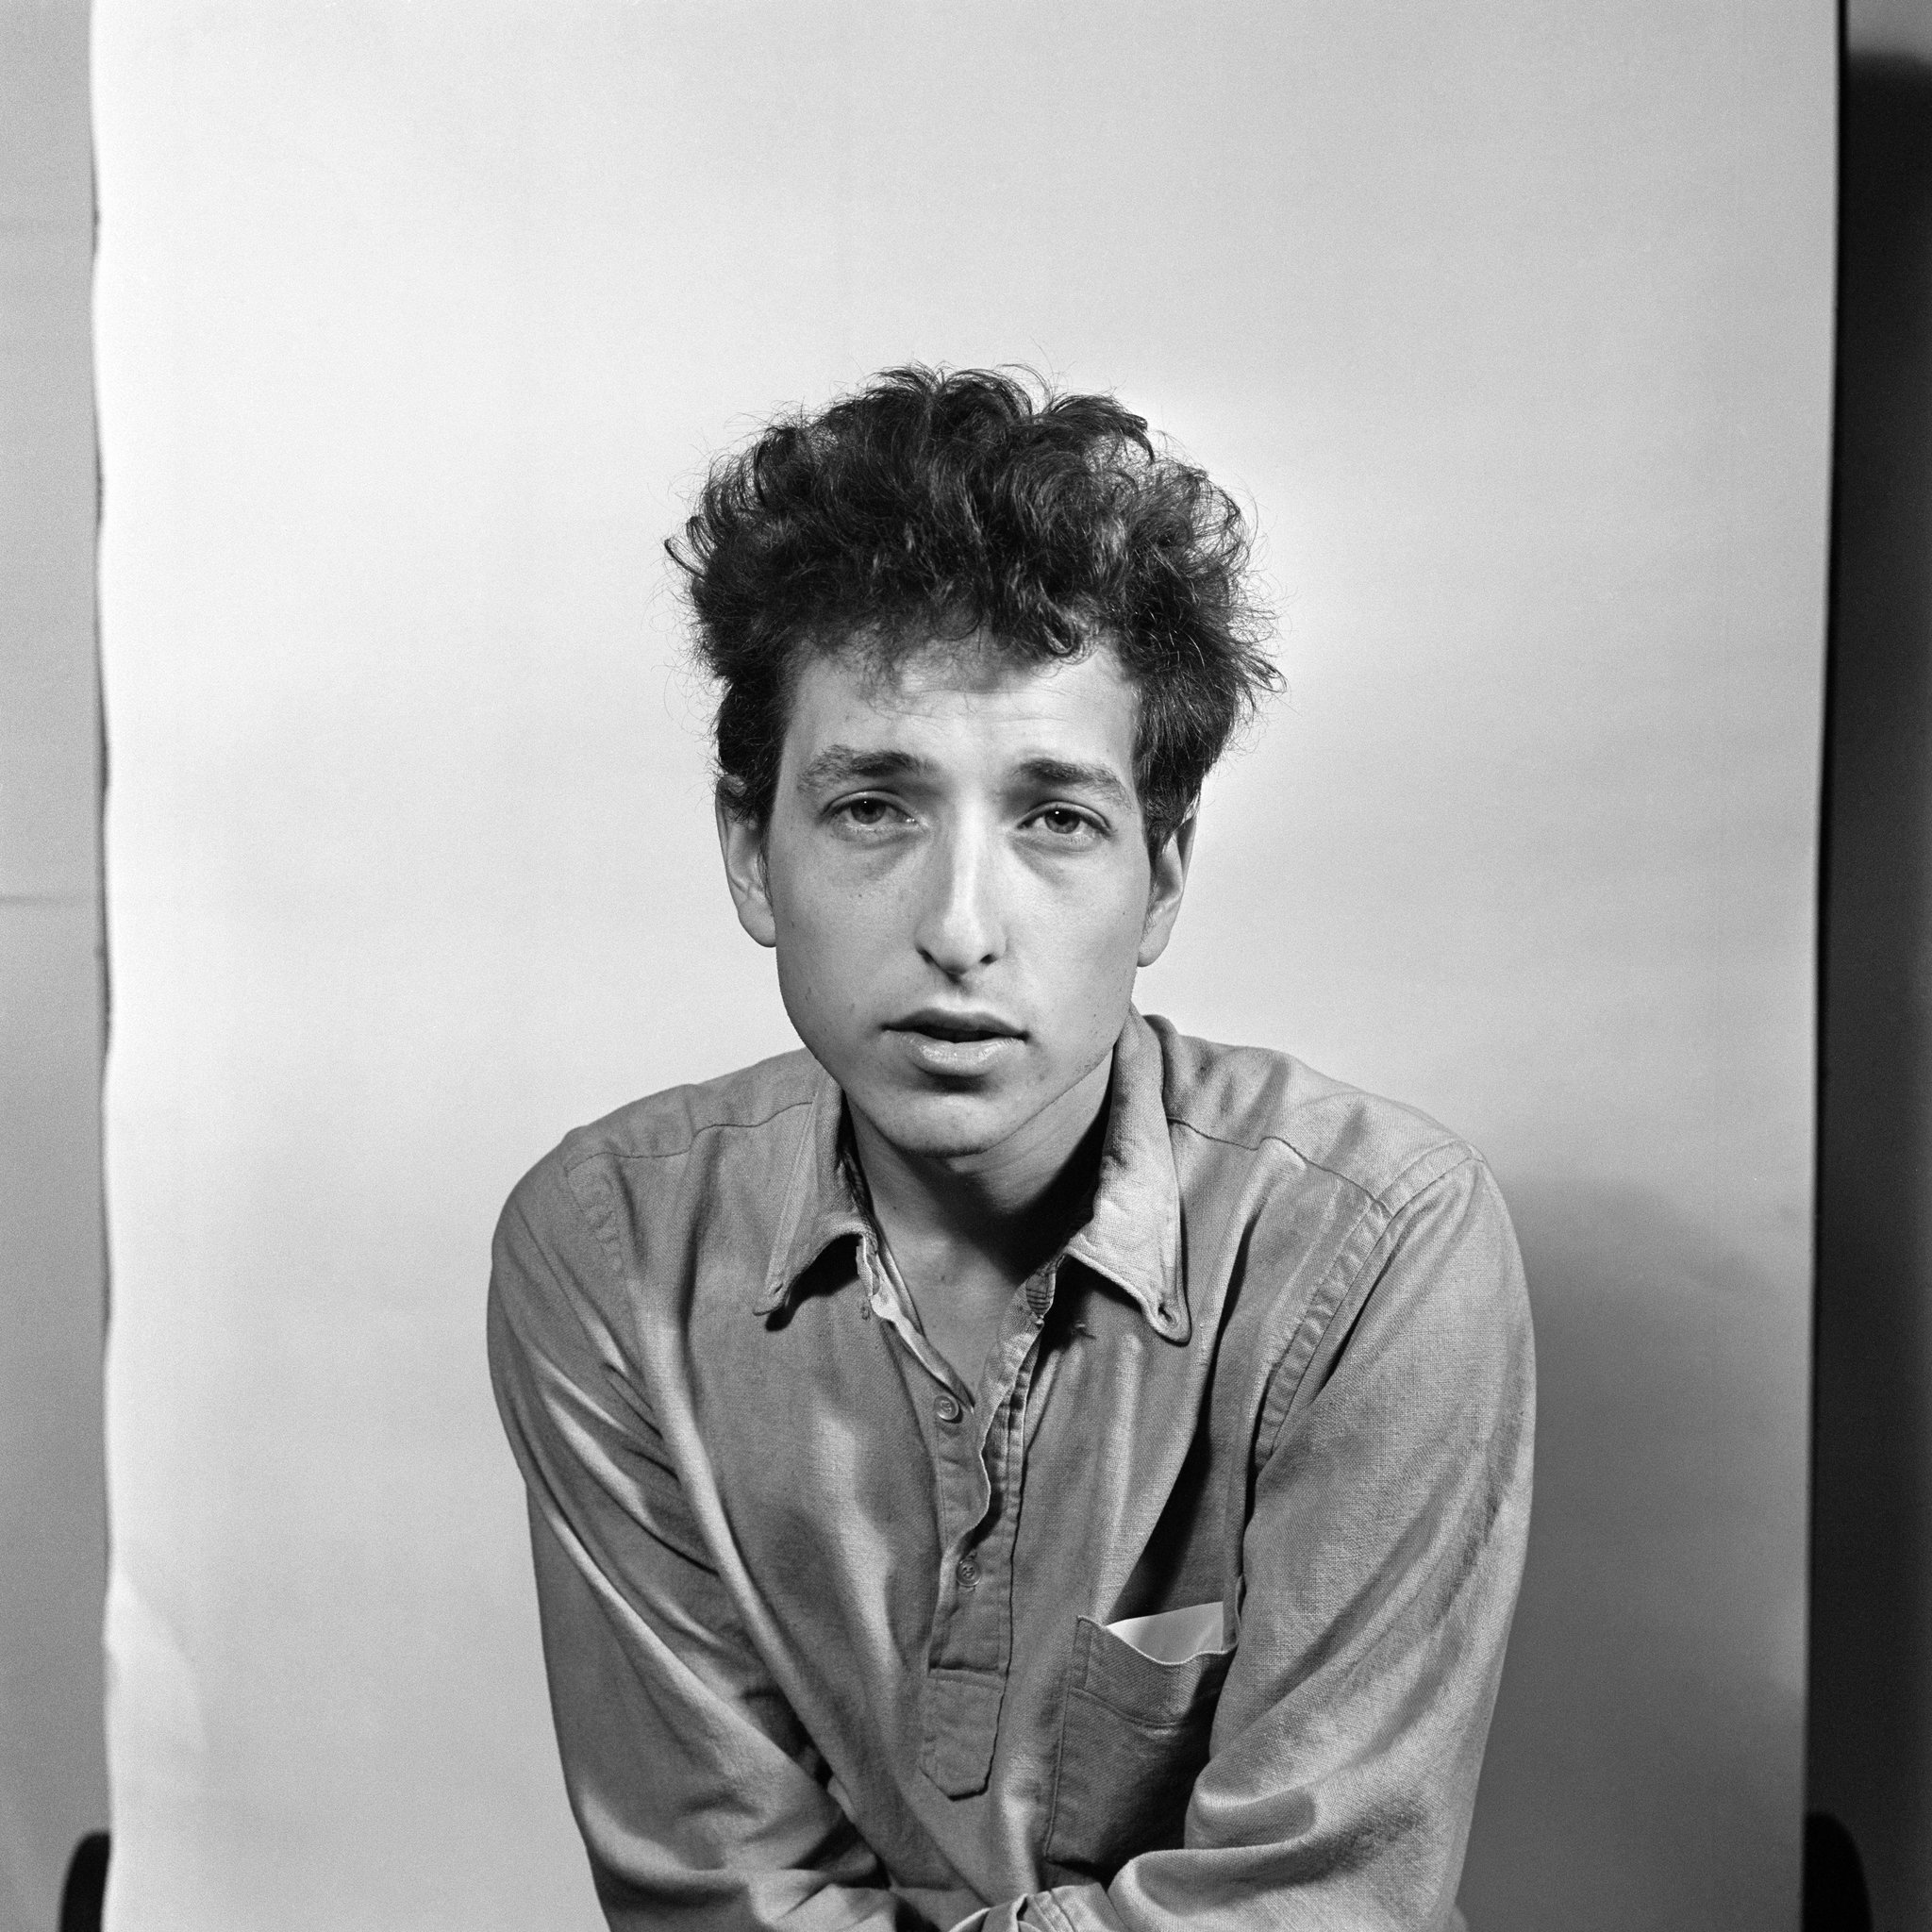

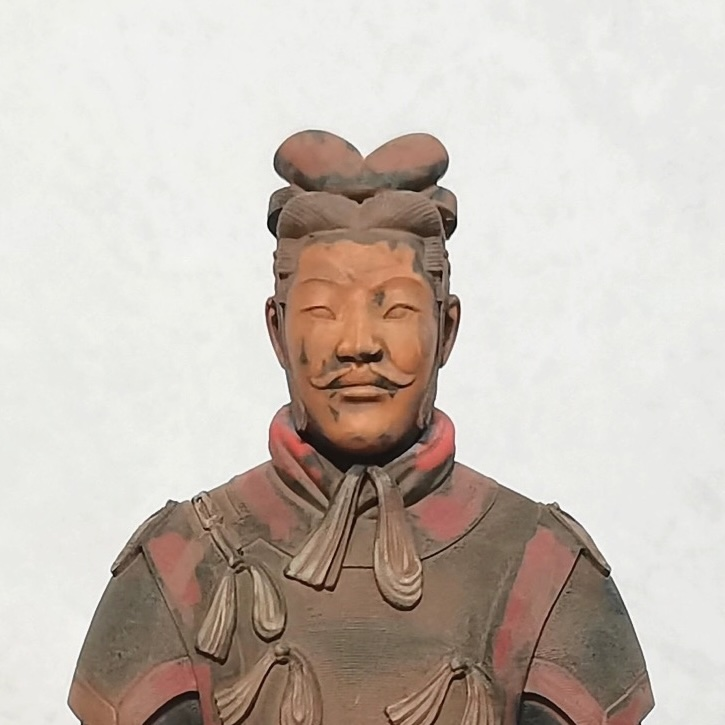

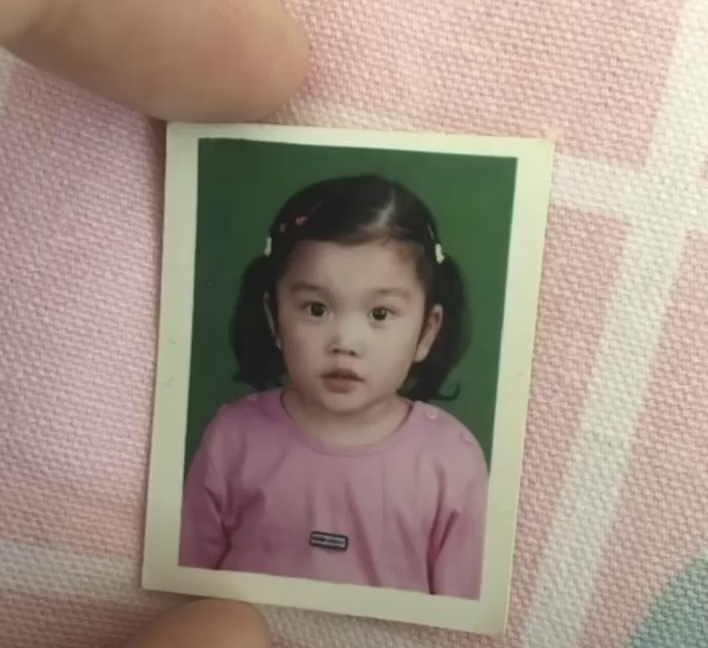

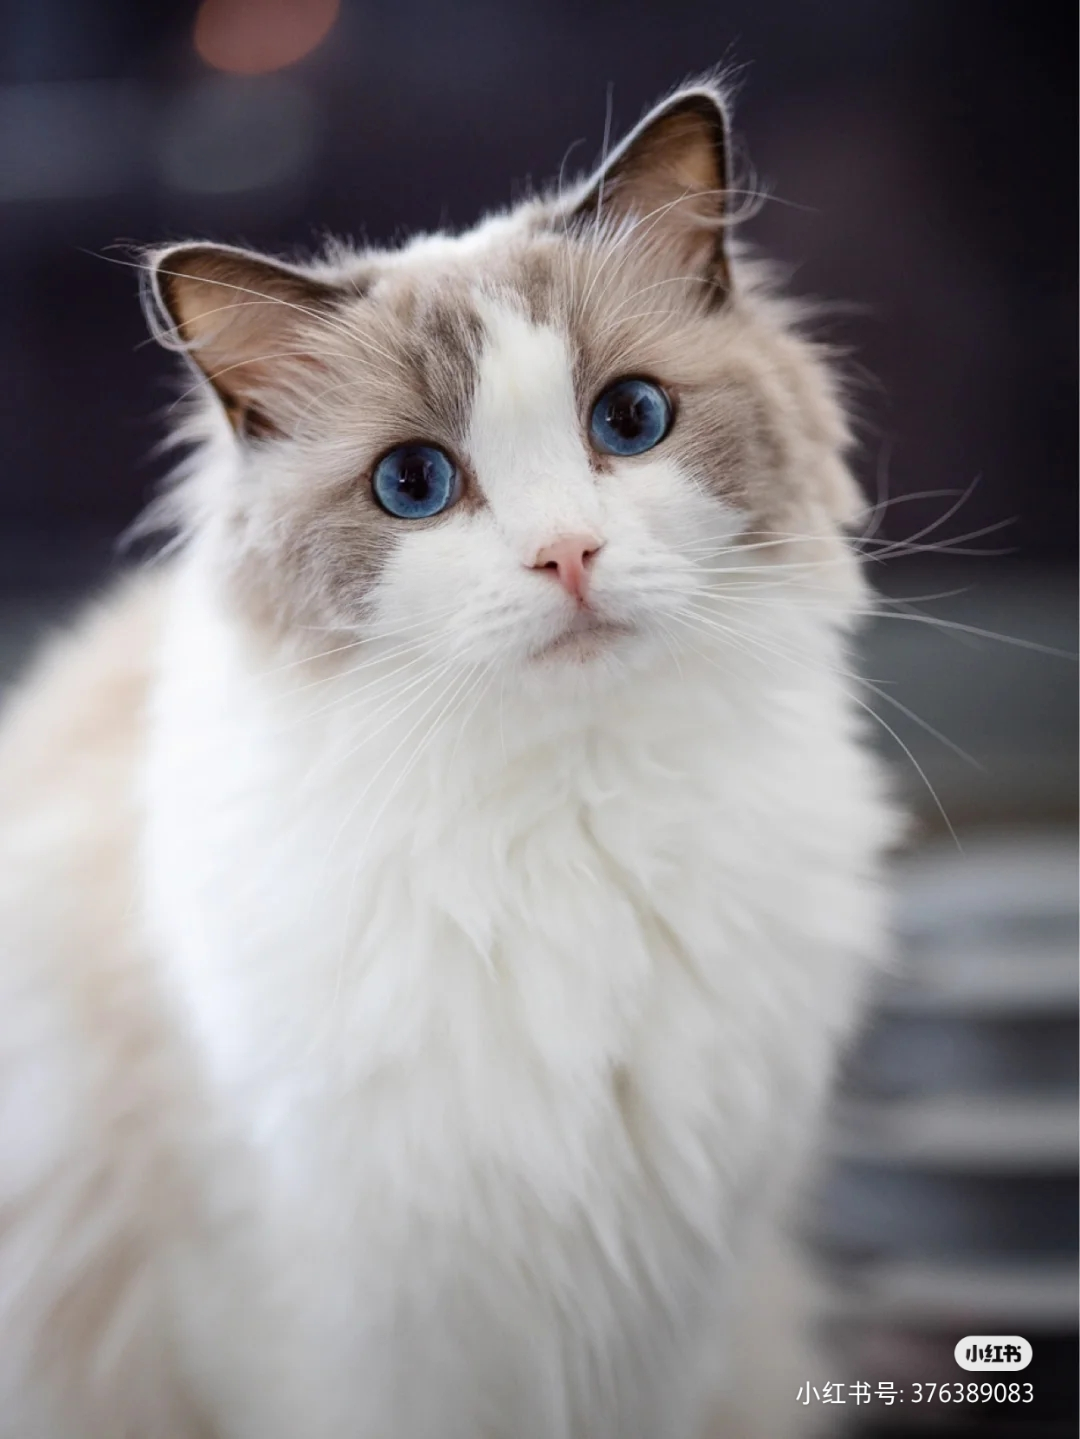

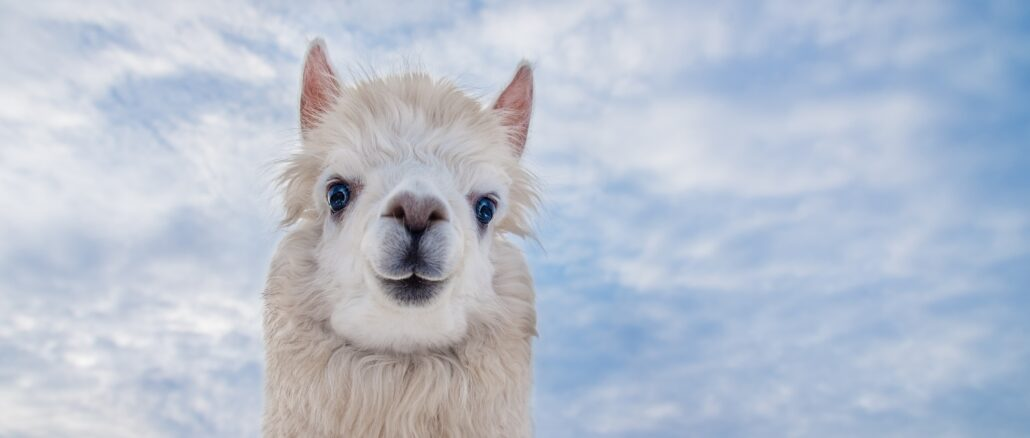

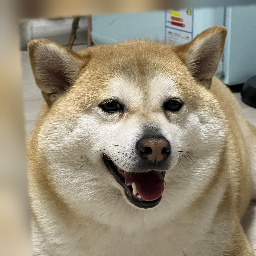

(Còn 20 ảnh nữa không hiển thị trực tiếp...)


--- VIDEO BIỂU CẢM MẪU (DRIVING VIDEOS) ---


Lưu ý: Tệp d1.mp4 không tìm thấy.
Lưu ý: Tệp s13.mp4 không tìm thấy.

Sử dụng các tệp .pkl để tham khảo các mẫu chuyển động đã xử lý (Motion Templates).


In [ ]:
# @title Xem Trực Tiếp Ảnh và Video Mẫu

import os
import glob
from IPython.display import display, HTML, Image, Video

# Đảm bảo bạn đang ở thư mục LivePortrait
if os.path.basename(os.getcwd()) != 'LivePortrait':
    print("WARNING: Not in the LivePortrait directory. Changing directory...")
    %cd LivePortrait

SOURCE_DIR = "assets/examples/source"
DRIVING_DIR = "assets/examples/driving"

# ====================================================================
# PHẦN 1: TỔNG QUAN TỆP
# ====================================================================
print("--- TỔNG QUAN CÁC TỆP MẪU ---")
print(f"Danh sách Ảnh Tĩnh (Source) trong /{SOURCE_DIR}:")
!ls -1 {SOURCE_DIR}
print("\nDanh sách Video Biểu cảm (Driving) trong /{DRIVING_DIR}:")
!ls -1 {DRIVING_DIR}

print("\n" + "="*50 + "\n")

# ====================================================================
# PHẦN 2: HIỂN THỊ ẢNH NGUỒN (SOURCE IMAGES)
# ====================================================================
print("--- ẢNH TĨNH MẪU (SOURCE IMAGES) ---")
source_files = glob.glob(os.path.join(SOURCE_DIR, "*.jpg")) + glob.glob(os.path.join(SOURCE_DIR, "*.png"))

for i, filepath in enumerate(source_files):
    if i < 6: # Chỉ hiển thị tối đa 6 ảnh để tránh quá tải
        display(HTML(f"<b>{os.path.basename(filepath)}:</b>"))
        display(Image(filename=filepath, width=150))
    else:
        print(f"(Còn {len(source_files) - 6} ảnh nữa không hiển thị trực tiếp...)")
        break

print("\n" + "="*50 + "\n")

# ====================================================================
# PHẦN 3: HIỂN THỊ VIDEO BIỂU CẢM (DRIVING VIDEOS)
# ====================================================================
print("--- VIDEO BIỂU CẢM MẪU (DRIVING VIDEOS) ---")
driving_videos = glob.glob(os.path.join(DRIVING_DIR, "*.mp4"))

# Chọn một số video tiêu biểu để hiển thị
videos_to_display = {
    "d0.mp4": "Ví dụ cơ bản",
    "d1.mp4": "Ví dụ khác",
    "s13.mp4": "Ví dụ Video nguồn (Video-to-Video)",
}

for filename, description in videos_to_display.items():
    filepath = os.path.join(DRIVING_DIR, filename)
    if os.path.exists(filepath):
        display(HTML(f"<b>{filename}</b> ({description}):"))
        # Hiển thị video, giảm kích thước để load nhanh hơn
        display(Video(filepath, embed=True, html_attributes="controls loop", width=250))
    else:
        print(f"Lưu ý: Tệp {filename} không tìm thấy.")

print("\nSử dụng các tệp .pkl để tham khảo các mẫu chuyển động đã xử lý (Motion Templates).")